**Titanic Survival Model**
The Titanic dataset is a widely used dataset in the field of data science and machine learning. It provides information about the passengers on board the RMS Titanic, including whether they survived or not. This dataset is a classic example for exploring data analysis, feature engineering, and building predictive models. It is often used for teaching and learning purposes due to its simple structure and historical significance.

**Goal**
Predict if a passenger survived the sinking of the Titanic or not.


**Dataset Description**

1. PassengerID : ID of the Passenger.
1. Survived: Survival (0 = No; 1 = Yes)
1. Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
1. Name : Name of the Passenger
1. Sex: Sex of the Passenger (Female / Male)
1. Age: Age of the Passenger.
1. Sibsp: Number of siblings/spouses aboard
1. Parch: Number of parents/children aboard
1. Ticket : Ticket number.
1. Fare: Passenger fare (British pound)
1. Cabin: Cabin number
1. Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Importing Libraries**

In [373]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [374]:
titanic = pd.read_csv('/kaggle/input/titanic/tested.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [375]:
#printing the shape and information about the data (Rows and Columns and Information)
print(titanic.shape)
print(titanic.info())

(418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [376]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [377]:
#null data
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# DATA VISUALISATION


In [378]:
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

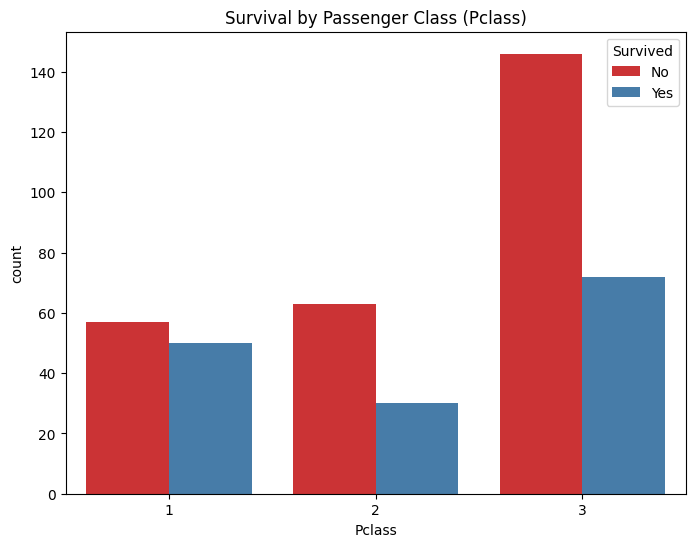

In [379]:
#Bar plot of 'Pclass' vs. 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class (Pclass)')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

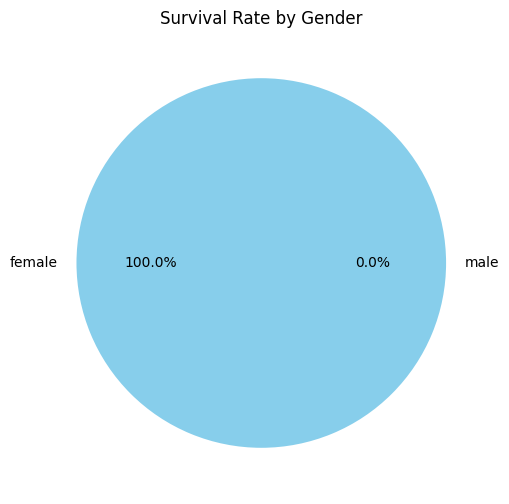

In [380]:
#survival rate by gender
gender_survival = titanic.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(6, 6))
plt.pie(gender_survival, labels=gender_survival.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Gender')
plt.show()

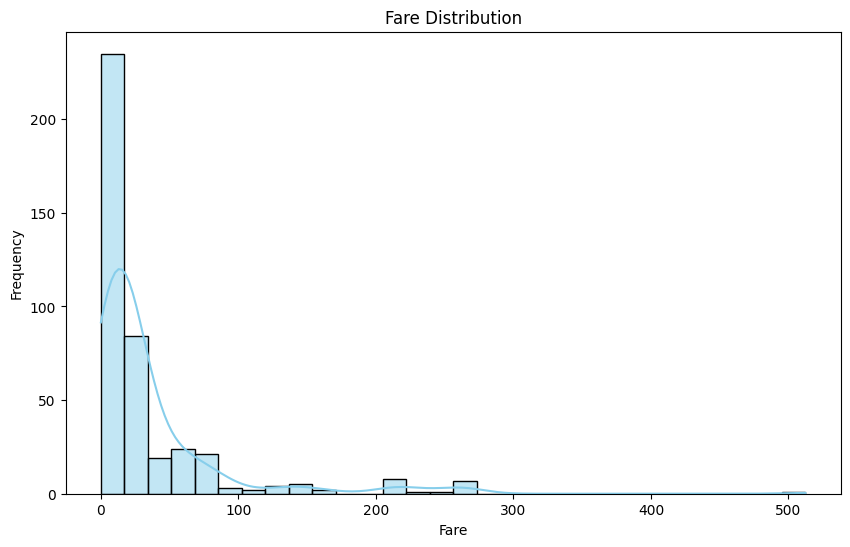

In [381]:
#Histogram of 'Fare' distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Fare', bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

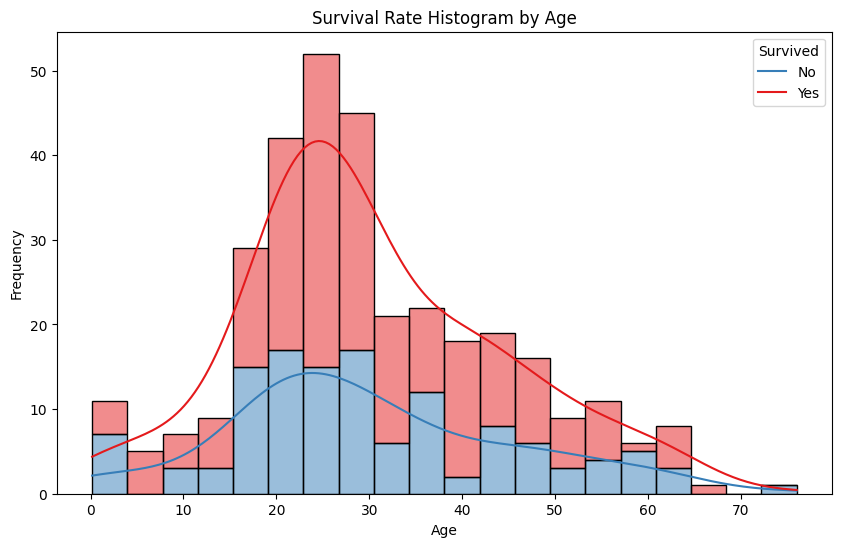

In [382]:
#histogram of survival rates based on age
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=20, kde=True, palette='Set1', multiple='stack')
plt.title('Survival Rate Histogram by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

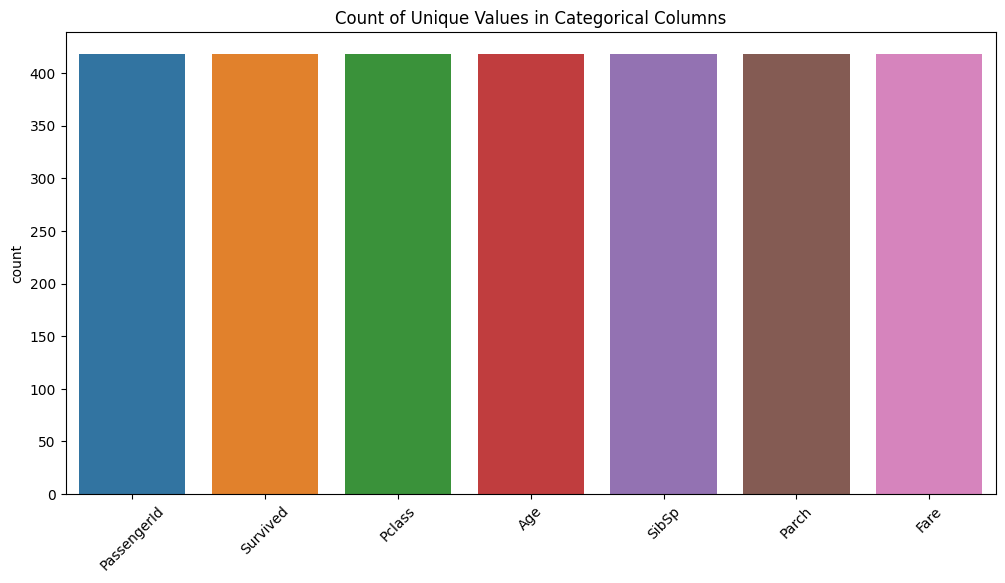

In [383]:
#bar plot to show the count of unique values in each categorical column
plt.figure(figsize=(12, 6))
sns.countplot(data=titanic)
plt.title('Count of Unique Values in Categorical Columns')
plt.xticks(rotation=45)
plt.show()

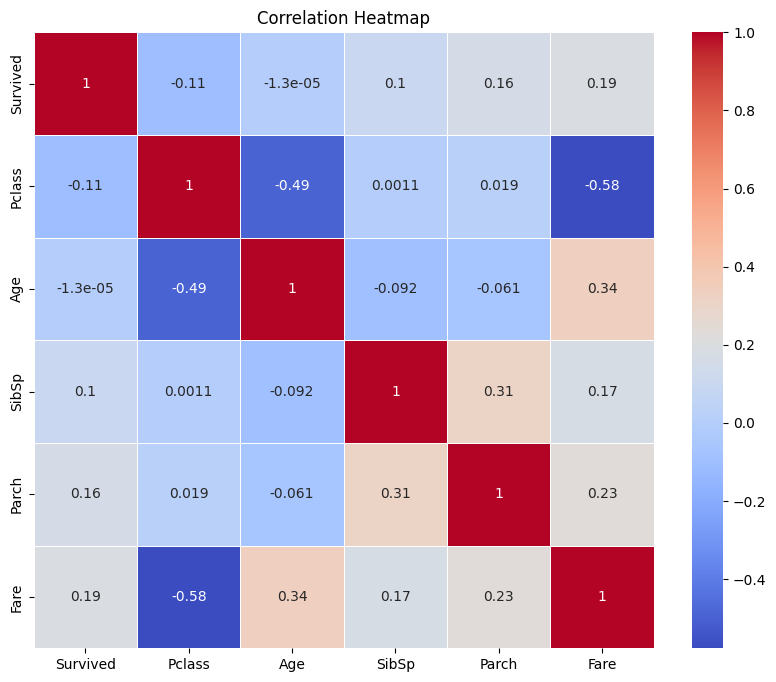

In [384]:
# Calculate the correlation matrix for relevant numerical columns
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = titanic[numerical_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Data Cleaning**

In [385]:
#null values in the dataset
null_values = titanic.isnull().sum()
print(null_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


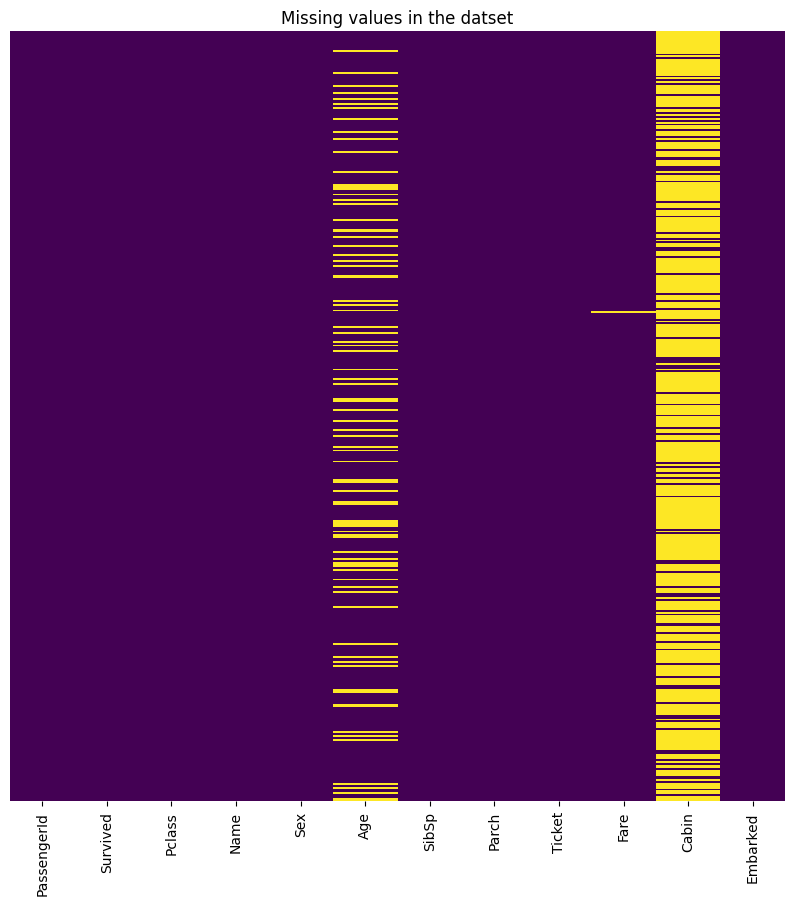

In [386]:
#heatmap to visualize missing values in the datset 
plt.figure(figsize=(10,10))
sns.heatmap(titanic.isnull(), cmap='viridis' ,cbar=False, yticklabels=False)
plt.title('Missing values in the datset')
plt.show()

To handle missing age values in the dataset, I strategy that uses information from other columns, specifically 'Pclass' (passenger class) and 'SibSp' (the count of siblings/spouses). By leveraging these features, I can make educated guesses about passengers' ages.

- First, I grouped the data by 'Pclass' and 'SibSp' to create distinct groups.
- For each group, I calculated the median age, which serves as a representative age value for that group.

Next, I imputed missing ages by associating each passenger's 'Pclass' and 'SibSp' values with the respective group and using the corresponding median age as the imputed age value.

In [387]:
#Grouping by 'Pclass' and 'SibSp' and calculate the median age for each group
age_grouped = titanic.groupby(['Pclass', 'SibSp'])['Age'].median().reset_index()

#function to impute missing ages based on the grouped data
def impute_age(row):
    condition = (
        (age_grouped['Pclass'] == row['Pclass']) & 
        (age_grouped['SibSp'] == row['SibSp'])
    )
    return age_grouped[condition]['Age'].values[0]

#Filling missing ages using the impute_age function
titanic['Age'] = titanic.apply(lambda row: impute_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)


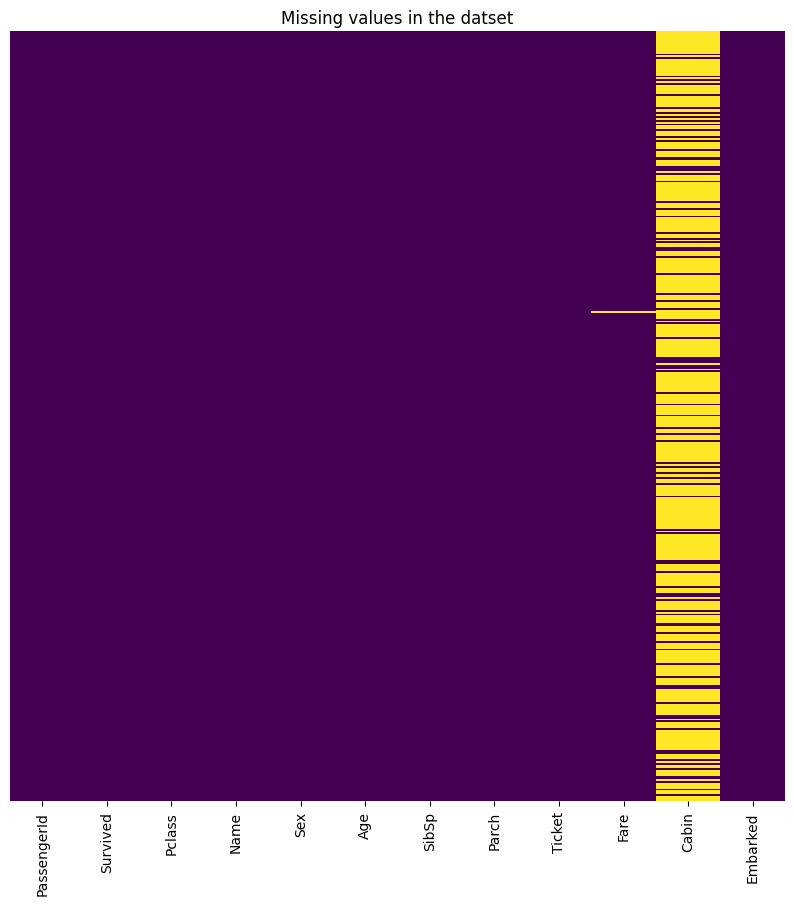

In [388]:
#heatmap to visualize missing values in the datset 
plt.figure(figsize=(10,10))
sns.heatmap(titanic.isnull(), cmap='viridis' ,cbar=False, yticklabels=False)
plt.title('Missing values in the datset')
plt.show()

In [389]:
titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))
titanic = titanic.drop(['Cabin'], axis=1)

In [390]:
# Droping irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket' , 'Embarked']
titanic.drop(columns=columns_to_drop, inplace=True)

In [391]:
#Summary statistics for the 'Age' feature
age_summary = titanic['Age'].describe()
print(age_summary)

count    418.000000
mean      29.161483
std       13.041355
min        0.170000
25%       22.000000
50%       25.000000
75%       36.375000
max       76.000000
Name: Age, dtype: float64


In [392]:
print(titanic['Age'])

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    20.0
Name: Age, Length: 418, dtype: float64


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

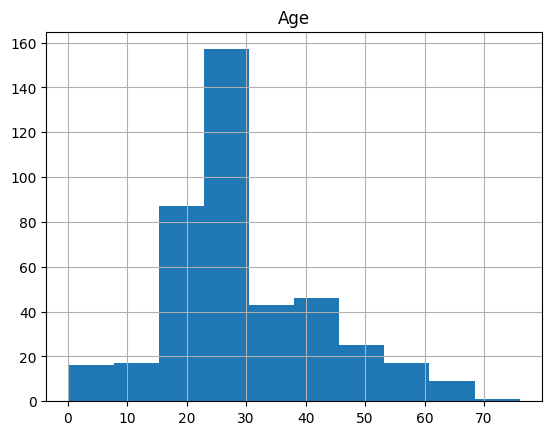

In [393]:
titanic.hist(column='Age')

In [394]:
def map_age(col):
    if col > 0 and col <= 2:
        return 'baby'
    elif col > 2 and col <= 12:
        return 'child'
    elif col > 12 and col <= 19:
        return 'teenager'
    elif col > 19 and col <= 30:
        return 'young'
    elif col > 30 and col <= 40:
        return 'mature'
    elif col > 40 and col <= 60:
        return 'mid-ager'
    else:
        return 'old'

In [395]:
titanic['AgeGroup'] = titanic['Age'].apply(map_age)
titanic['AgeGroup']

0        mature
1      mid-ager
2           old
3         young
4         young
         ...   
413       young
414      mature
415      mature
416       young
417       young
Name: AgeGroup, Length: 418, dtype: object

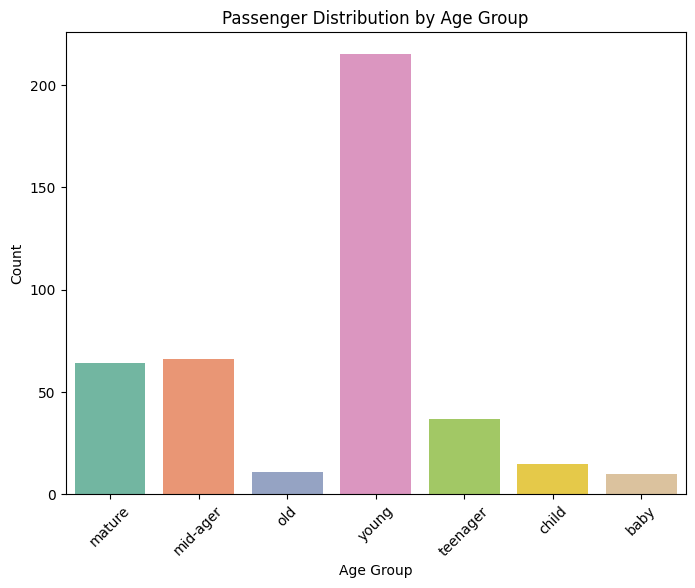

In [396]:
#bar plot for the age groups
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='AgeGroup', palette='Set2')
plt.title('Passenger Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [397]:
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         1
CabinBool    0
AgeGroup     0
dtype: int64

In [398]:
titanic.dropna(how='any', inplace=True)
titanic.drop_duplicates(inplace=True)

In [399]:
titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
CabinBool    0
AgeGroup     0
dtype: int64

In [400]:
titanic.describe(include="all")


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,AgeGroup
count,376.000000,376.000000,376,376.000000,376.000000,376.000000,376.000000,376.000000,376
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,young
freq,NaN,NaN,233,NaN,NaN,NaN,NaN,NaN,175
mean,0.380319,2.196809,NaN,29.583777,0.489362,0.436170,38.508367,0.242021,NaN
std,0.486112,0.853910,NaN,13.550335,0.929455,1.025629,58.145717,0.428878,NaN
min,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,0.000000,NaN
50%,0.000000,2.000000,NaN,26.000000,0.000000,0.000000,15.564600,0.000000,NaN
75%,1.000000,3.000000,NaN,39.000000,1.000000,0.250000,37.503150,0.000000,NaN


# **Feature encoding**

In [401]:
x=titanic.iloc[:, 1:10]
y=titanic['Survived']

In [402]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,AgeGroup
0,3,male,34.5,0,0,7.8292,0,mature
1,3,female,47.0,1,0,7.0000,0,mid-ager
2,2,male,62.0,0,0,9.6875,0,old
3,3,male,27.0,0,0,8.6625,0,young
4,3,female,22.0,1,1,12.2875,0,young
...,...,...,...,...,...,...,...,...
411,1,female,37.0,1,0,90.0000,1,mature
412,3,female,28.0,0,0,7.7750,0,young
414,1,female,39.0,0,0,108.9000,1,mature
415,3,male,38.5,0,0,7.2500,0,mature


In [403]:
y

0      0
1      1
2      0
3      0
4      1
      ..
411    1
412    1
414    1
415    0
417    0
Name: Survived, Length: 376, dtype: int64

In [404]:
from sklearn.preprocessing import LabelEncoder

In [405]:
def Feature_Encoder(X , cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X

In [406]:
cols = ('Sex', 'AgeGroup')
x = Feature_Encoder(titanic, cols=cols)

In [407]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,AgeGroup
0,0,3,1,34.5,0,0,7.8292,0,2
1,1,3,0,47.0,1,0,7.0000,0,3
2,0,2,1,62.0,0,0,9.6875,0,4
3,0,3,1,27.0,0,0,8.6625,0,6
4,1,3,0,22.0,1,1,12.2875,0,6
...,...,...,...,...,...,...,...,...,...
411,1,1,0,37.0,1,0,90.0000,1,2
412,1,3,0,28.0,0,0,7.7750,0,6
414,1,1,0,39.0,0,0,108.9000,1,2
415,0,3,1,38.5,0,0,7.2500,0,2


**Splitting DATA**

In [408]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)

#shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (300, 9)
Y_train shape: (300,)
X_test shape: (76, 9)
Y_test shape: (75,)


In [409]:
from sklearn.preprocessing import MinMaxScaler

In [410]:
MinMaxScaler = MinMaxScaler(feature_range=(0, 1))
x_train = MinMaxScaler.fit_transform(x_train)
x_test = MinMaxScaler.transform(x_test)

# **MODELS**

**linear regression**

In [411]:
titanic


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,AgeGroup
0,0,3,1,34.5,0,0,7.8292,0,2
1,1,3,0,47.0,1,0,7.0000,0,3
2,0,2,1,62.0,0,0,9.6875,0,4
3,0,3,1,27.0,0,0,8.6625,0,6
4,1,3,0,22.0,1,1,12.2875,0,6
...,...,...,...,...,...,...,...,...,...
411,1,1,0,37.0,1,0,90.0000,1,2
412,1,3,0,28.0,0,0,7.7750,0,6
414,1,1,0,39.0,0,0,108.9000,1,2
415,0,3,1,38.5,0,0,7.2500,0,2


In [413]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [415]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
print("Test mean squared error = {} ".format(mean_squared_error(y_test, lin_reg.predict(x_test))))
print("Test r2 score = {} ".format(r2_score(y_test, lin_reg.predict(x_test))))

Test mean squared error = 4.034316409821684e-32 
Test r2 score = 1.0 


In [416]:
arr = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinBool', 'AgeGroup']

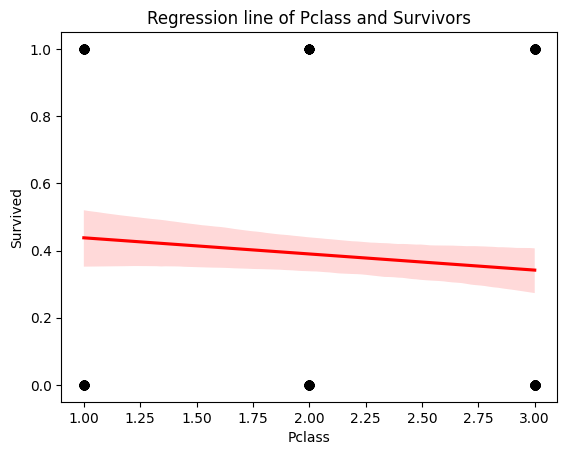

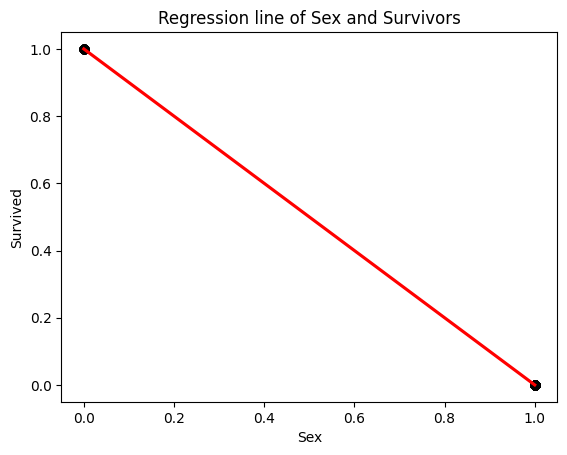

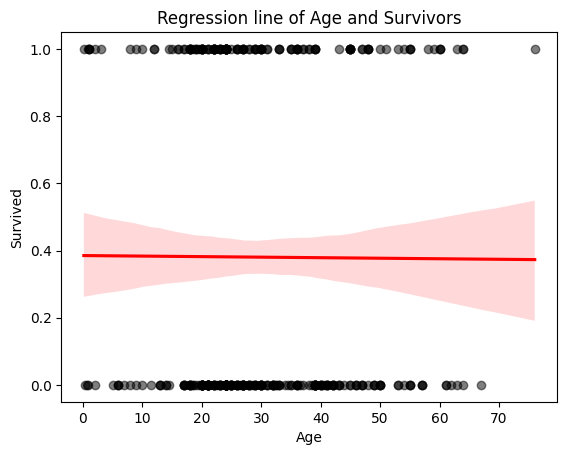

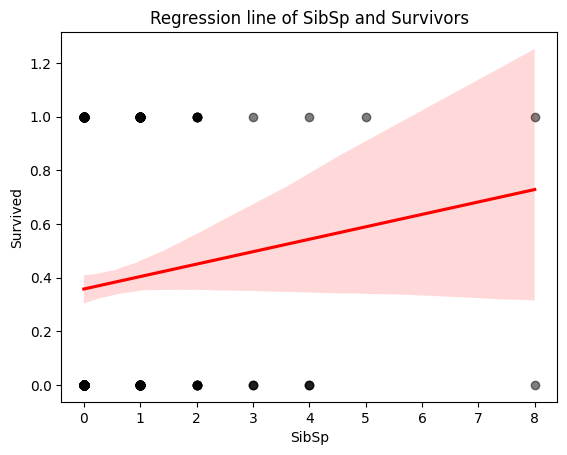

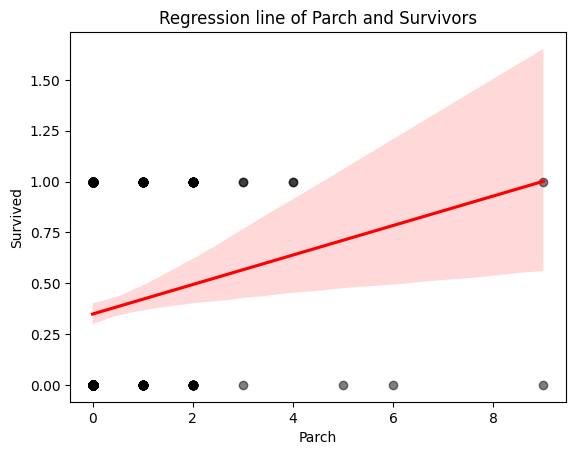

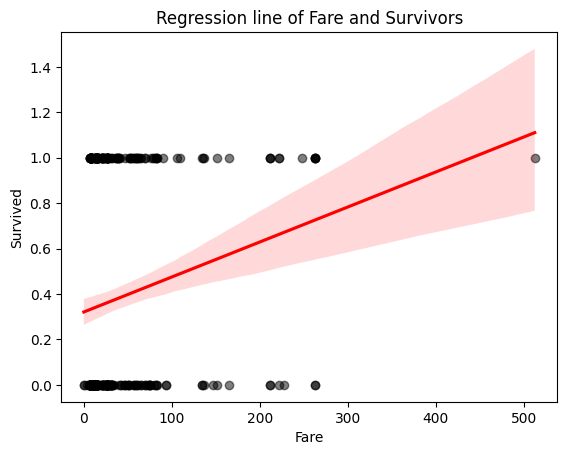

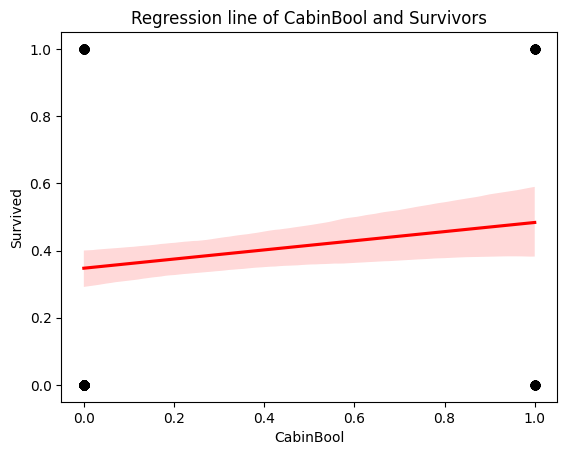

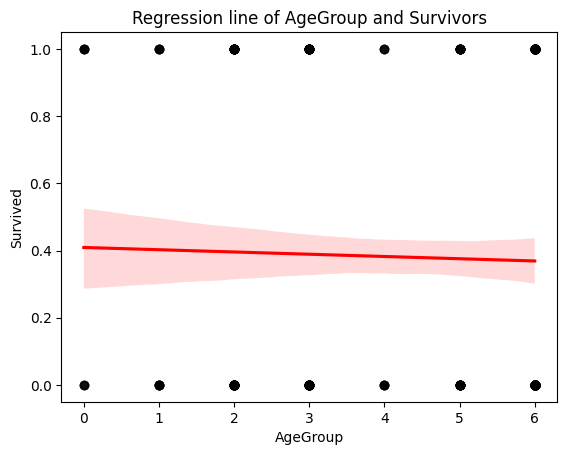

In [418]:
for var in arr:
    plt.figure()
    sns.regplot(x=var, y='Survived', data=titanic, scatter_kws={"color": "black", "alpha": 0.5}, line_kws={"color": "red"})
    plt.title(f'Regression line of {var} and Survivors')
    plt.show()

**RandomForestClassifier**

In [419]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [420]:
print("Test mean squared error = {} ".format(mean_squared_error(y_test, randomforest.predict(x_test))))
print("Test accuracy score = {} ".format(round(accuracy_score(y_test, randomforest.predict(x_test))*100 , 2)))

Test mean squared error = 0.0 
Test accuracy score = 100.0 


**KNeighborsClassifier**

In [421]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClass = KNeighborsClassifier()
KNeighborsClass.fit(x_train, y_train)

KNeighborsClassifier()

In [422]:
print("Test mean squared error = {} ".format(mean_squared_error(y_test, KNeighborsClass.predict(x_test))))
print("Test accuracy score = {} ".format(round(accuracy_score(y_test, KNeighborsClass.predict(x_test))*100 , 2)))

Test mean squared error = 0.0 
Test accuracy score = 100.0 


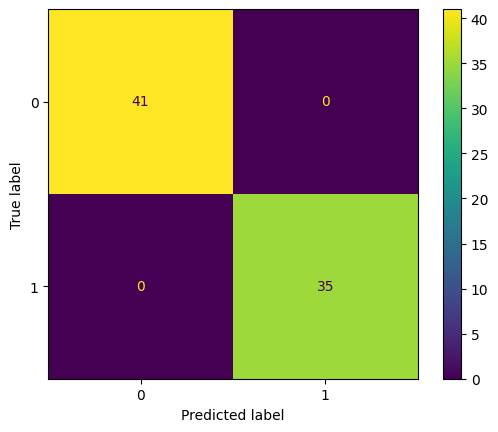

In [423]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, KNeighborsClass.predict(x_test)))
cm_display.plot()
plt.show()

**SVC**

In [424]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [425]:
print("Test mean squared error = {} ".format(mean_squared_error(y_test, svc.predict(x_test))))
print("Test accuracy score = {} ".format(round(accuracy_score(y_test, svc.predict(x_test))*100 , 2)))

Test mean squared error = 0.0 
Test accuracy score = 100.0 


**GaussianNB**

In [427]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [428]:
print("Test mean squared error = {} ".format(mean_squared_error(y_test, GNB.predict(x_test))))
print("Test accuracy score = {} ".format(round(accuracy_score(y_test, GNB.predict(x_test))*100 , 2)))

Test mean squared error = 0.0 
Test accuracy score = 100.0 


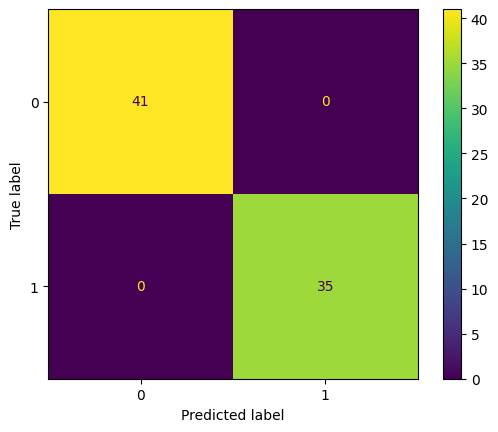

In [429]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, GNB.predict(x_test)))
cm_display.plot()
plt.show()

In [432]:
titanic.to_csv('updated_data.csv', index= False)